In [83]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import r2_score

from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [51]:
df = pd.read_csv('banco.csv', encoding = "ISO-8859-1", low_memory = False).drop(['Unnamed: 0'], axis=1,errors='ignore')

In [52]:
df.head()

,Id,DN,Idade,Codsexo,RaÃ§a,pesoi,pesof,Alt,instruc,RendaSM,...,TFG_2_2014,TFG_2_2014_EQ,ESTAGIO_BANCO_2_2014,ESTAGIO_EQ_2_2014,ESTAGIOI,ESTAGIOF,ESTAGIOI_EQ,ESTAGIOF_EQ,CREATININAI,CREATININAF
0,27,29-May-40,74.0,2,1,74.9,70.0,167.0,Fundamental completo,1.14,...,NaN,NaN,NaN,NaN,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 2 - 60-89 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 2 - 60-89 ml,1.40,1.10
1,40,21-Apr-37,78.0,1,1,83.4,80.3,155.0,NÃ£o sabe ler/escrever,NaN,...,31.18,31.32,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 3b - 30-44 ml,2.50,1.68
2,42,26-Jul-11,102.0,2,1,41.9,41.9,160.0,Alfabetizado,NaN,...,NaN,NaN,NaN,NaN,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3a - 45-59 ml,1.32,1.50
3,44,15-Nov-31,83.0,2,1,44.5,45.0,147.0,Fundamental Incompleto,NaN,...,NaN,NaN,NaN,NaN,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,EstÃ¡gio 4 - 15-29 ml,2.50,2.30
4,47,2-Aug-54,61.0,1,1,82.0,90.3,165.0,Fundamental Incompleto,1.00,...,32.34,32.48,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3b - 30-44 ml,EstÃ¡gio 3a - 45-59 ml,EstÃ¡gio 3b - 30-44 ml,1.21,1.70


De acordo com os resultados do João, as variáveis que devo analisar são:\
$\textbf{Idade}$\
$\textbf{PAS_inicial}$\
$\textbf{PAS_final}$\
$\textbf{HemoglobinaI}$\
$\textbf{ColesterolTotalF}$\
$\textbf{GlicemiadeJejumI}$\
$\textbf{ColesterolHDLI}$\
$\textbf{ColesterolHDLF}$\
$\textbf{AcidoUricoI}$\
Essas variáveis obtiveram melhores resultados no teste de regressão simples, considerando a TFG_1_2011 como variável alvo.

In [61]:
#separando as colunas que eu quero analisar
reg_mul = pd.DataFrame(index=[i for i in range(df.shape[0])],columns=['Idade','PAS_inicial','PAS_final','HemoglobinaI','ColesterolTotalF',
             'GlicemiadeJejumI','ColesterolHDLI','ColesterolHDLF','AcidoUricoI','TFG_1_2011_EQ'])
reg_mul['Idade'] = df['Idade']
reg_mul['PAS_inicial'] = df['PAS_inicial']
reg_mul['PAS_final'] = df['PAS_final']
reg_mul['HemoglobinaI'] = df['HemoglobinaI']
reg_mul['ColesterolTotalF'] = df['ColesterolTotalF']
reg_mul['GlicemiadeJejumI'] = df['GlicemiadeJejumI']
reg_mul['ColesterolHDLI'] = df['ColesterolHDLI']
reg_mul['ColesterolHDLF'] = df['ColesterolHDLF']
reg_mul['AcidoUricoI'] = df['AcidoUricoI']

reg_mul['TFG_1_2011_EQ'] = df['TFG_1_2011_EQ']
#analinando se tem valores nulos
reg_mul.isna().any(),reg_mul.isnull().any()

(Idade               False
 PAS_inicial         False
 PAS_final           False
 HemoglobinaI        False
 ColesterolTotalF    False
 GlicemiadeJejumI    False
 ColesterolHDLI      False
 ColesterolHDLF      False
 AcidoUricoI         False
 TFG_1_2011_EQ       False
 dtype: bool,
 Idade               False
 PAS_inicial         False
 PAS_final           False
 HemoglobinaI        False
 ColesterolTotalF    False
 GlicemiadeJejumI    False
 ColesterolHDLI      False
 ColesterolHDLF      False
 AcidoUricoI         False
 TFG_1_2011_EQ       False
 dtype: bool)

### Normalizando os dados

In [62]:
scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
reg_mul_norm = scaler.fit_transform(reg_mul)
reg_mul_norm = pd.DataFrame(reg_mul_norm,columns=reg_mul.keys())
reg_mul_norm

,Idade,PAS_inicial,PAS_final,HemoglobinaI,ColesterolTotalF,GlicemiadeJejumI,ColesterolHDLI,ColesterolHDLF,AcidoUricoI,TFG_1_2011_EQ
0,0.317073,0.054393,0.196787,0.680715,-0.158654,-0.349591,-0.113445,-0.421687,-0.169231,-0.510397
1,0.414634,0.489540,0.036145,0.042146,-0.187500,-0.653583,-0.344538,-0.373494,-0.430769,-0.817392
2,1.000000,-0.121339,-0.598394,0.195402,-0.184376,-0.750459,-0.106288,-0.250117,-0.323077,-0.508995
3,0.536585,0.079498,-0.108434,0.604087,-0.293269,-0.750459,0.033613,0.108434,-0.169231,-0.756180
4,0.000000,0.129707,0.020080,0.693487,0.076923,-0.733756,0.432773,-0.204819,-0.323077,-0.553105
...,...,...,...,...,...,...,...,...,...,...
1278,-0.317073,0.330544,0.277108,0.514687,-0.184376,-0.542346,-0.260504,-0.250117,-0.153746,-0.292743
1279,0.121951,-0.087866,0.004016,0.450830,0.293269,-0.630199,-0.113445,-0.253012,-0.046154,-0.391991
1280,-0.048780,0.079498,-0.124498,0.501916,-0.076923,-0.680307,-0.323529,-0.421687,0.076923,-0.526658
1281,0.414634,0.062762,0.132530,0.629630,-0.134615,-0.636880,0.054622,-0.204819,-0.123077,-0.472174


#### Separando em x e y

In [63]:
X = reg_mul_norm.drop(columns='TFG_1_2011_EQ')
y = reg_mul_norm['TFG_1_2011_EQ']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,random_state= 20200301)

### Regressão Múltipla

In [64]:
#primeiro irei considerar o sm do statsmodels
import statsmodels.api as sm
x_mul = sm.add_constant(xtrain, prepend=True)
res =sm.OLS(ytrain,x_mul).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TFG_1_2011_EQ   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     36.43
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           4.31e-55
Time:                        22:51:04   Log-Likelihood:                 35.317
No. Observations:                 898   AIC:                            -50.63
Df Residuals:                     888   BIC:                            -2.631
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4723      0.027    -17.798      0.000      -0.524      -0.420
Idade               -0.2568      0.024    -10.526      0.000      -0.305      -0.209
PAS_inicial         -0.0262      0.039     -0.666      0.505      -0.104       0.051
PAS_final           -0.0833      0.045     -1.870      0.062      -0.171       0.004
HemoglobinaI         0.1374      0.034      4.012      0.000       0.070       0.205
ColesterolTotalF     0.0449      0.042      1.065      0.287      -0.038       0.128
GlicemiadeJejumI     0.0811      0.034      2.380      0.018       0.014       0.148
ColesterolHDLI       0.0013      0.035      0.036      0.971      -0.068       0.071
ColesterolHDLF       0.0050      0.033      0.153      0.878      -0.059       0.069
AcidoUricoI         -0.2693      0.029     -9.255      0.000      -0.326      -0.212
==============================================================================
Omnibus:                      199.862   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.770
Skew:                           1.101   Prob(JB):                    6.33e-128
Kurtosis:                       6.287   Cond. No.                         8.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#calculando os valores da predição para y
ypred = []
coef = res.params.values
for i in range(len(x_mul)):#intera nas linhas do x resultado
    x_func = x_mul.iloc[i]
    ypred.append((coef[0]*x_func[0])+(coef[1]*x_func[1])+ (coef[2]*x_func[2])+(coef[3]*x_func[3])
                  +(coef[4]*x_func[4])+(coef[5]*x_func[5])+(coef[6]*x_func[6])+(coef[7]*x_func[7])
                  +(coef[8]*x_func[8])+(coef[9]*x_func[9]))

(898, 10) (385,)


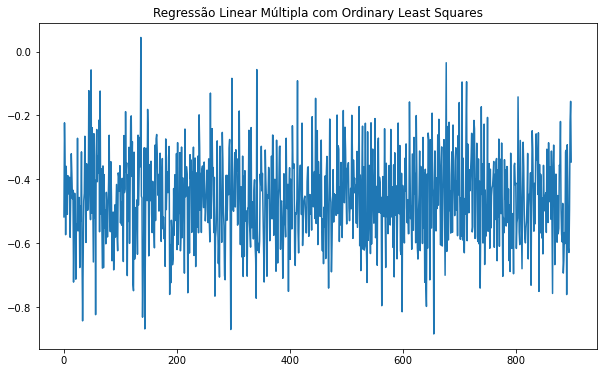

In [67]:
print(x_mul.shape,ytest.shape)
plt.figure(figsize=(10,6))
# plt.plot(ytrain)
plt.plot(ypred)
plt.title('Regressão Linear Múltipla com Ordinary Least Squares')

# plt.figure(figsize=(10,8))
# x_ax = range(len(xtest))
# plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
# plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
# plt.title('Regressão Linear Múltipla com Ordinary Least Squares')
# plt.legend()
plt.show()

#### Testando o linalg

In [76]:
x_lin = np.c_[xtrain, np.ones(xtrain.shape[0])] # add bias term
beta_hat = np.linalg.lstsq(x_lin,ytrain)[0]
beta_hat

/home/gabic9814/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([-0.2568032 , -0.02623021, -0.08331563,  0.13741623,  0.04490423,
        0.08111263,  0.00128304,  0.00502382, -0.26927755, -0.47233042])

In [90]:
resposta_linalg = np.dot(x_lin,beta_hat)
r2_score(ytrain,resposta_linalg)

0.26964310683145865

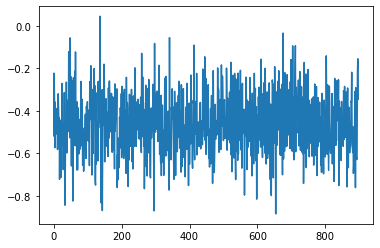

In [87]:
plt.plot(resposta_linalg)